#**Modelo 3: Redes Neuronales**

In [ ]:
#Datos
import pandas as pd

#Plots
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten

import nltk
nltk.download('stopwords')
stopwords_es = nltk.corpus.stopwords.words('spanish')

import nltk
import string

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train = pd.read_csv("train_normalizado.csv", engine = "python")

In [ ]:
df_train.head(5)

,ID,review_es,sentimiento,sentimiento_1
0,0,críticos mencionado después ver solo 1 oz epis...,positivo,1
1,1,pequeña pequeña producción técnica filmación i...,positivo,1
2,2,pensé manera maravillosa pasar tiempo fin sema...,positivo,1
3,3,básicamente familia niño pequeño jake piensa z...,negativo,0
4,4,amor tiempo petter mattei película visualmente...,positivo,1


In [ ]:
df_copy_id = df_train['ID']
df_train.drop(columns = (['sentimiento','ID']))

,review_es,sentimiento_1
0,críticos mencionado después ver solo 1 oz epis...,1
1,pequeña pequeña producción técnica filmación i...,1
2,pensé manera maravillosa pasar tiempo fin sema...,1
3,básicamente familia niño pequeño jake piensa z...,0
4,amor tiempo petter mattei película visualmente...,1
...,...,...
23234,peter coyote único nombre reconocí lista proye...,1
23235,odio personas cine hablan nuevo pantalla razon...,0
23236,película dennis hopper gary busey erika elenia...,1
23237,ahorre dinero sido fan fullmoon productions ti...,0


In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_pred,y_test))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar

df_train_x = df_train['review_es']

vectorizer = CountVectorizer(min_df=0.001,max_features=10000)

df_train_x_vectorized = vectorizer.fit_transform(df_train_x)


In [ ]:

#Creo un dataset con la variable target
df_train_y = df_train['sentimiento_1'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_train_x_vectorized,
                                                    df_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=0)

Armamos la red neuronal

In [ ]:
#preparacion del modelo
model = Sequential()
model.add(Embedding(10000, 200, input_length=10000))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
modelo = model.fit(x_train.toarray(), y_train, epochs=5, batch_size=500)

Epoch 1/5
33/33 [==============================] - 99s 3s/step - loss: 8.7137 - acc: 0.5019
Epoch 2/5
33/33 [==============================] - 89s 3s/step - loss: 0.7960 - acc: 0.6437
Epoch 3/5
33/33 [==============================] - 89s 3s/step - loss: 0.4143 - acc: 0.8412
Epoch 4/5
33/33 [==============================] - 89s 3s/step - loss: 0.3101 - acc: 0.8802
Epoch 5/5
33/33 [==============================] - 90s 3s/step - loss: 0.2502 - acc: 0.9042


In [ ]:
y_prob_test = model.predict(x_test.toarray())

218/218 [==============================] - 18s 83ms/step


##Redes Neuronales

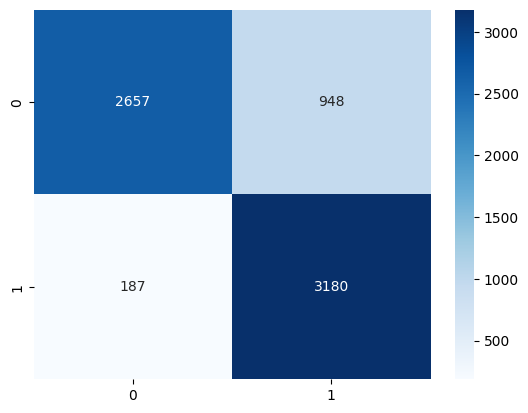

F1-score: 0.848565710473649


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

y_pred_test = np.where(y_prob_test>0.6,1,0)

ds_validacion=pd.DataFrame(y_pred_test,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

## # Calcular la matriz de confusión
cm_train = confusion_matrix(ds_validacion.y_pred, ds_validacion.y_real)


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

# # Agregar etiquetas a los ejes
# plt.xlabel('Predicted')
# plt.ylabel('True')

# # Mostrar el gráfico
plt.show()


f1 = f1_score(ds_validacion.y_real,ds_validacion.y_pred)

# # Imprimir el F1-score
print("F1-score:", f1)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      2844
           1       0.94      0.77      0.85      4128

    accuracy                           0.84      6972
   macro avg       0.84      0.85      0.84      6972
weighted avg       0.86      0.84      0.84      6972



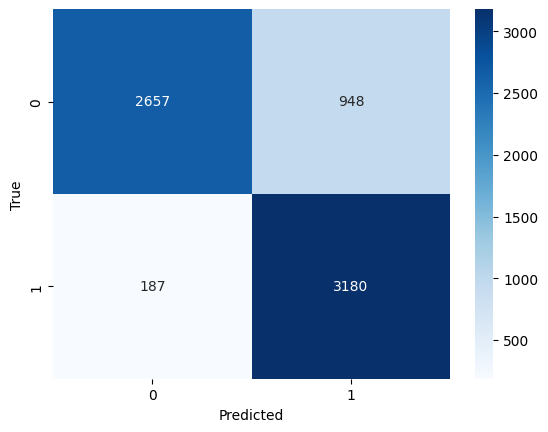

In [ ]:
metricas(y_pred_test,y_test)

Kaggle Submition


In [ ]:
df_test  = pd.read_csv("test_normalizado.csv", engine="python")
df_copy_id_test = df_test['ID'] #copio el id y lo quito del dataframe
df_test.drop(['ID'], axis='columns', inplace=True)
df_test.head(5)

,review_es
0,mayor virtud película existencia hecho podamos...
1,experto cinéfilo pocas veces tan juego sala ci...
2,si incondicional humor estilo tele 5 si termin...
3,sé pasando si gente deja llevar modas si verda...
4,"amanece,y quedo solo,siento fondoun mar vacío,..."


In [ ]:
matriz_prediccion =  vectorizer.transform(df_test['review_es'])

In [ ]:
y_predict_valid = model.predict(matriz_prediccion)
y_pred_test_valid = np.where(y_predict_valid>0.6,1,0)
submit =  pd.DataFrame(zip(df_copy_id_test,y_pred_test_valid),columns=['ID','sentimiento'])

submit['sentimiento'] = np.where(submit['sentimiento'] == 1, 'positivo', 'negativo')

submit.to_csv('Submit_test.csv',index = False)
